In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x= np.arange(-10,10)

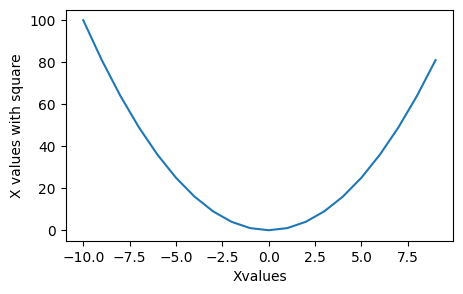

In [5]:
plt.figure(figsize=(5,3))
plt.plot(x,x**2)
plt.xlabel("Xvalues")
plt.ylabel("X values with square")
plt.show()

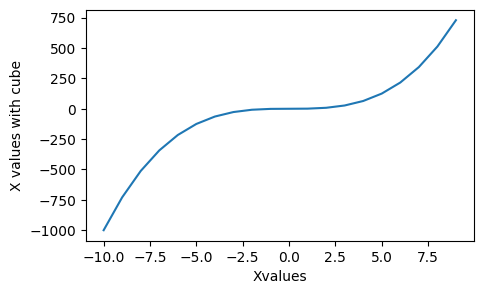

In [6]:
plt.figure(figsize=(5,3))
plt.plot(x,x**3)
plt.xlabel("Xvalues")
plt.ylabel("X values with cube")
plt.show()

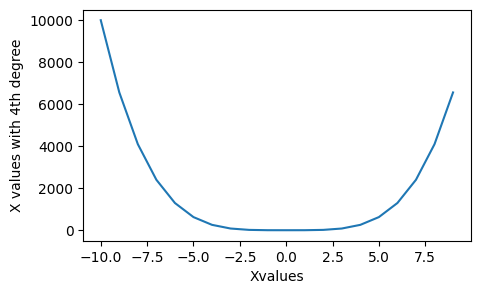

In [7]:
plt.figure(figsize=(5,3))
plt.plot(x,x**4)
plt.xlabel("Xvalues")
plt.ylabel("X values with 4th degree")
plt.show()

In [12]:
df = pd.read_csv("Position_salaries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [13]:
df


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


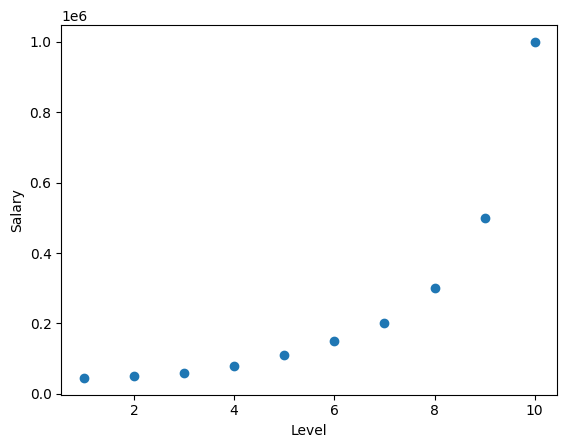

In [15]:
plt.scatter(df["Level"],df["Salary"])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [46]:
#df.corr()


In [21]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [22]:
from sklearn.linear_model import LinearRegression

In [25]:
X=df[["Level"]].values
print(X.shape)
y=df["Salary"].values
print(y.shape)

(10, 1)
(10,)


In [26]:
model = LinearRegression()
model.fit(X,y)                                      #small case for single dim , capital for multiple dim

LinearRegression()

In [34]:
model.coef_

array([80878.78787879])

In [35]:
model.intercept_

-195333.33333333337

In [28]:
yhat = model.predict(X)      #predicting values
yhat.shape


(10,)

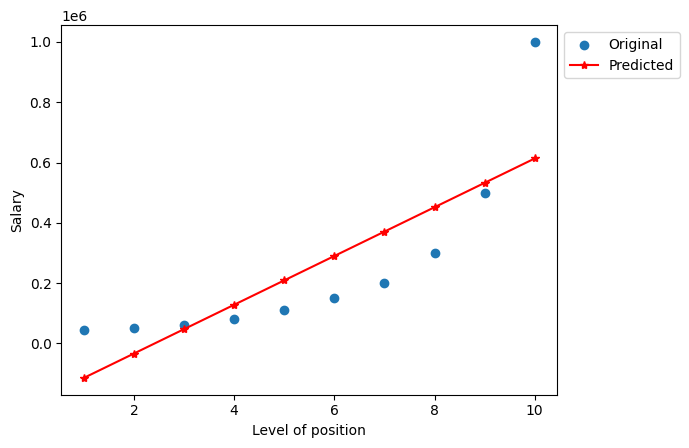

In [33]:
plt.scatter(df['Level'],df['Salary'],label='Original')
plt.plot(df['Level'],yhat,c='r',marker='*',label='Predicted')
plt.xlabel('Level of position')
plt.ylabel('Salary')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y,yhat)

0.6690412331929895

In [ ]:
###with degree 2 of X


In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
Poly2 = PolynomialFeatures(degree = 2)
X2 = Poly2.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [53]:
model2 = LinearRegression()
model2.fit(X2,y)

yhat2 = model2.predict(X2)      #predicting values
yhat2.shape

(10,)

In [54]:
r2_score(y,yhat2)

0.9162082221443942

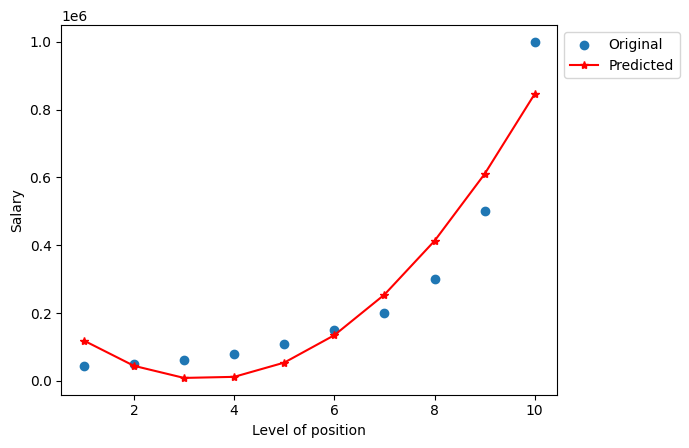

In [55]:
plt.scatter(df['Level'],df['Salary'],label='Original')
plt.plot(df['Level'],yhat2,c='r',marker='*',label='Predicted')
plt.xlabel('Level of position')
plt.ylabel('Salary')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#with degree 3

In [56]:
Poly3 = PolynomialFeatures(degree = 3)
X3 = Poly3.fit_transform(X)
X3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [57]:
model3 = LinearRegression()
model3.fit(X3,y)

yhat3 = model3.predict(X3)      #predicting values
yhat3.shape

(10,)

In [58]:
r2_score(y,yhat3)

0.9812097727913366

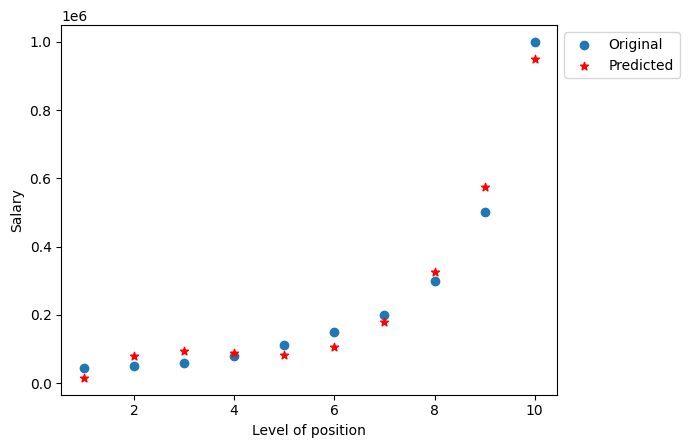

In [60]:
plt.scatter(df['Level'],df['Salary'],label='Original')
plt.scatter(df['Level'],yhat3,c='r',marker='*',label='Predicted')
plt.xlabel('Level of position')
plt.ylabel('Salary')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#test the data

In [61]:
test_sal = np.array([[1.2,2.5,3.5,8.5]]).reshape(-1,1)
test_sal

array([[1.2],
       [2.5],
       [3.5],
       [8.5]])

In [62]:
model.predict(test_sal).round(2)

array([-98278.79,   6863.64,  87742.42, 492136.36])

In [64]:
model2.predict(Poly2.transform(test_sal)).round(2)

array([100703.03,  21437.5 ,   5157.2 , 506710.23])

In [65]:
model3.predict(Poly3.transform(test_sal)).round(2)

array([ 32672.82,  91272.29,  92914.19, 436875.44])

In [ ]:
#We r satisfied with the 3rd model so if we have to save the 3rd model ,we l.l save model3 as well as preprocessing ie poly3

In [ ]:
#logistic Regression